In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('boston.csv')
df = df.drop(['B'], axis=1)
#normalize data with min-max scaling
df=(df-df.values.min())/(df.values.max()-df.values.min())

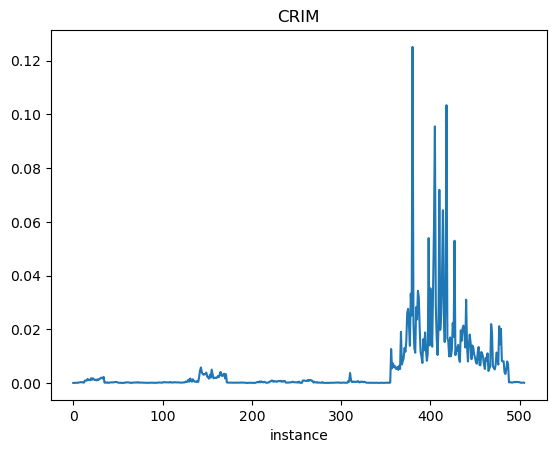

In [325]:
# for i in df.columns:
#     plt.figure()
#     plt.title(i)
#     plt.plot(df[i])

df["CRIM"].plot()
plt.title("CRIM")
plt.xlabel('instance')
plt.show()

In [326]:
df2 = df.drop(["MEDV"], axis=1)
X = df2.to_numpy()
Y = df["MEDV"].to_numpy()
print(X.shape, Y.shape)
df2

(506, 12) (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.000009,0.025316,0.003249,0.0,0.000757,0.009248,0.091702,0.005752,0.001406,0.416315,0.021519,0.007004
1,0.000038,0.000000,0.009944,0.0,0.000660,0.009031,0.110970,0.006986,0.002813,0.340366,0.025035,0.012855
2,0.000038,0.000000,0.009944,0.0,0.000660,0.010105,0.085935,0.006986,0.002813,0.340366,0.025035,0.005668
3,0.000046,0.000000,0.003066,0.0,0.000644,0.009842,0.064416,0.008526,0.004219,0.312236,0.026301,0.004135
4,0.000097,0.000000,0.003066,0.0,0.000644,0.010052,0.076231,0.008526,0.004219,0.312236,0.026301,0.007496
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000088,0.000000,0.016779,0.0,0.000806,0.009273,0.097187,0.003486,0.001406,0.383966,0.029536,0.013601
502,0.000064,0.000000,0.016779,0.0,0.000806,0.008608,0.107876,0.003217,0.001406,0.383966,0.029536,0.012771
503,0.000085,0.000000,0.016779,0.0,0.000806,0.009812,0.127989,0.003049,0.001406,0.383966,0.029536,0.007932
504,0.000154,0.000000,0.016779,0.0,0.000806,0.009556,0.125598,0.003360,0.001406,0.383966,0.029536,0.009114


In [327]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        N,D = x.shape
        
        self.w = np.linalg.inv(x.T @ x)@x.T@y
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh
    


In [328]:
N = X.shape[0]
model = LinearRegression()
yh = model.fit(X,Y).predict(X)

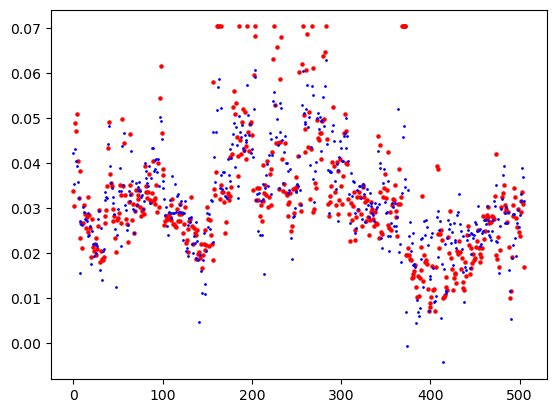

In [329]:
plt.scatter(np.arange(X.shape[0]),Y, s=5, color='red')
plt.scatter(np.arange(X.shape[0]),yh, s=1, color='blue')

## Generate many tests of growing subsets of training data:

In [330]:
#Train and Test
import math
from math import log10, floor
from sklearn.model_selection import train_test_split

class train_and_test():
    
    def __init__(self, X, Y, arr, n):
        self.x = X
        self.y = Y
        self.arr = arr
        self.n = n
        pass
    
    def train_and_eval(self, tSize, show):
        
        X_train, X_test, Y_train, Y_test = train_test_split(self.x, self.y, test_size=tSize)
        model = LinearRegression()
        reg = model.fit(X_train, Y_train)
        yh = reg.predict(X_test)
        yhtrain = reg.predict(X_train)
        
        #METRICS ON TEST SET
        MSE = np.square(np.subtract(Y_test,yh)).mean()
        RMSE = math.sqrt(MSE)

        RSS = ((Y_test - yh)**2).sum()
        TSS = ((Y_test - yh.mean())**2).sum()
        r2 = 1 - RSS/TSS

        #METRICS ON TRAINING SET
        trainMSE = np.square(np.subtract(Y_train,yhtrain)).mean()
        trainRMSE = math.sqrt(trainMSE)

        trainRSS = ((Y_train - yhtrain)**2).sum()
        trainTSS = ((Y_train - yhtrain.mean())**2).sum()
        trainR2 = 1 - trainRSS/trainTSS
        
        test = [RMSE, r2]
        train = [trainRMSE, trainR2]
        
        if show: 
            #metrics on TEST set
            fig, ax = plt.subplots()
            ax.scatter(Y_test, yh)
            ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
            plt.title('Test Set, RMSE: %.3g, R2: %.3g' %(RMSE,r2))
            ax.set_xlabel("true y")
            ax.set_ylabel("predicted y")
            #plt.savefig('bTest20.png', bbox_inches='tight')
            plt.show()

            #metrics on TRAIN set
            fig, ax = plt.subplots()
            ax.scatter(Y_train, yhtrain)
            ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
            plt.title('Train Set, RMSE: %.3g, R2: %.3g' %(trainRMSE,trainR2))
            ax.set_xlabel("true y")
            ax.set_ylabel("predicted y")
            #plt.savefig('bTrain20.png', bbox_inches='tight')
            plt.show()
        else:
            return test,train
    
    def train_and_eval_mult(self):
        test_result_matrix = np.empty((self.n, len(self.arr)))
        train_result_matrix = np.empty((self.n, len(self.arr)))
        for i in range(self.n):
            for size in self.arr:
                k = (int) (size*10)-1
                te, tr = self.train_and_eval(size, False)
                #change to te[1],tr[1] for R2
                test_result_matrix[i,k] = te[0]
                train_result_matrix[i,k] = tr[0]
        return test_result_matrix, train_result_matrix
    
    def show(self, save):
        test, train = self.train_and_eval_mult()
        testDf = pd.DataFrame(test)
        trainDf = pd.DataFrame(train)
        testDf.columns = [str(e) for e in self.arr]
        trainDf.columns = [str(e) for e in self.arr]
        testDf = testDf.transpose()
        trainDf = trainDf.transpose()
        testDf.columns = [str(e) for e in range(self.n)]
        trainDf.columns = [str(e) for e in range(self.n)]
        
        #plot train data
        for i in range(self.n-1):
            plt.scatter(trainDf.index, trainDf[str(i+1)])
        plt.title('Performance on prediction of TRAIN set, n=%d' %self.n)
        plt.xlabel("percent of test split")
        #plt.ylabel("${R^2}$")
        plt.ylabel("RMSE")
        if save: plt.savefig('bTrainMulti%i.png' %self.n, bbox_inches='tight') 
        plt.show()
        
        #plot test data
        for i in range(self.n-1):
            plt.scatter(testDf.index, testDf[str(i+1)])
        plt.title('Performance on prediction of TEST set, n= %d' %self.n)
        plt.xlabel("percent of test split")
        #plt.ylabel("${R^2}$")
        plt.ylabel("RMSE")
        if save: plt.savefig('bTestMulti%i.png' %self.n, bbox_inches='tight')
        plt.show()
    

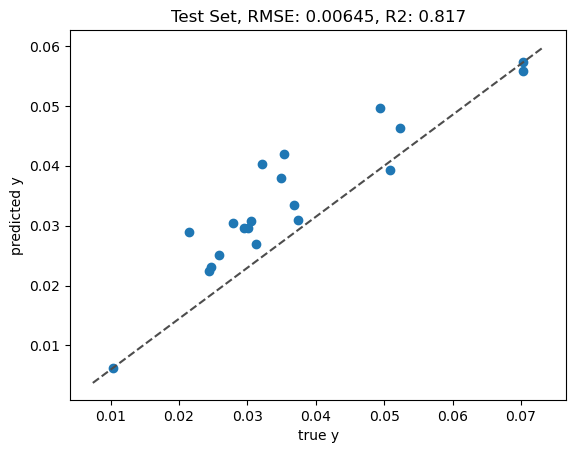

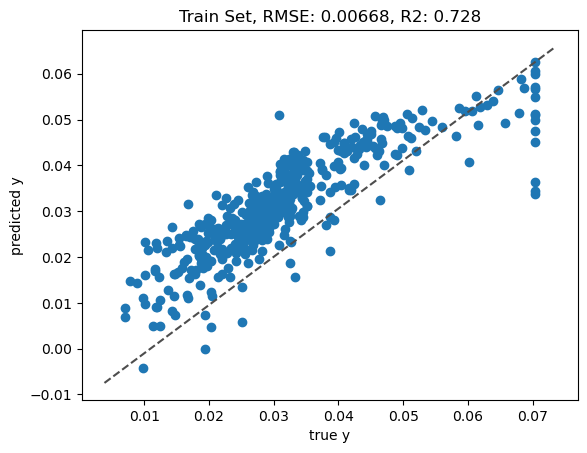

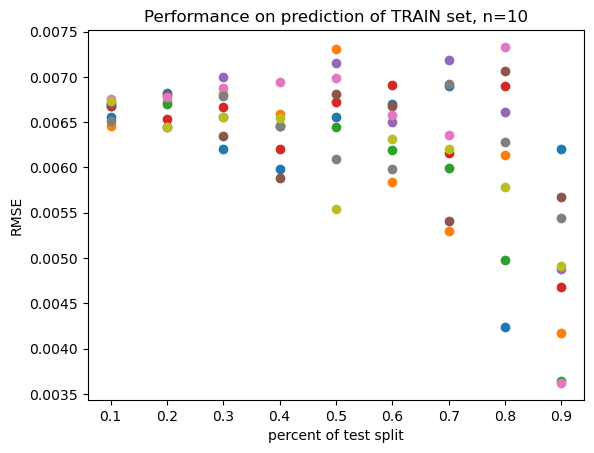

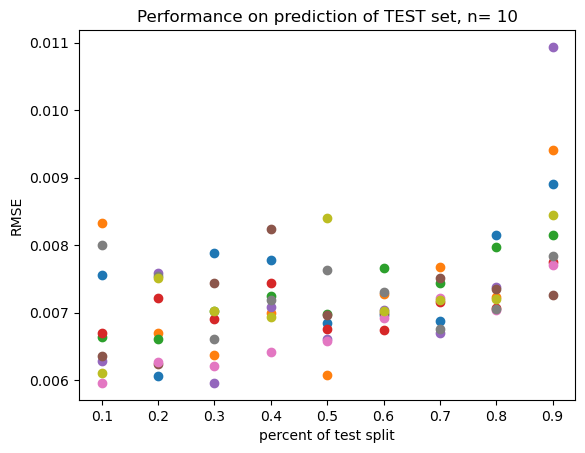

In [331]:
arr = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
evaluate = train_and_test(X,Y,arr,10)
evaluate.train_and_eval(20, True)
evaluate.show(False)

## Gaussian Basis Functions
Define five Gaussian basis functions for each feature. Select ${μ_j}$ values randomly from each respective feautre to determine the centers of these basis functions

In [332]:
#trying for feature 1
import copy
import random as rand

def column(X, d):
    return [row[d] for row in X]

Xg=copy.deepcopy(X)
Yg=copy.deepcopy(Y)

def gaussian(x, mu, s):
    return np.exp(-((x-mu)**2)/(2*s**2))

def make_phi(X):
    for numGaussians in range(5, len(X[0])):
        indexrange=range(1, len(X[0]))
        indices=rand.sample(indexrange, numGaussians)+[0]

        for columnnum in indices:
            averagex=np.average(column(X, columnnum))
            stdx=np.std(column(X, columnnum))
            for n in range(len(X)):
                Xg[n][columnnum]=gaussian(X[n][columnnum], averagex, stdx) if stdx!=0 else X[n][columnnum]

        phi=[[0]*len(indices) for i in range(len(X))]
        for i in range(len(phi)):
            for j in range(len(indices)):
                phi[i][j]=Xg[i][indices[j]]

        phi = np.array(phi)
        evaluate = train_and_test(phi,Y,arr,10)
        te, tr = evaluate.train_and_eval(20, False)
        print("Gaussian Features:",numGaussians,', R2: %.3g' %te[1])
    


make_phi(X)  

Gaussian Features: 5 , R2: 0.243
Gaussian Features: 6 , R2: 0.269
Gaussian Features: 7 , R2: 0.167
Gaussian Features: 8 , R2: 0.0265
Gaussian Features: 9 , R2: 0.111
Gaussian Features: 10 , R2: 0.347
Gaussian Features: 11 , R2: 0.502


## Stochastic Gradient Descent
implement mini-batch SGD for Linear Regression

In [414]:
class LinearRegressionSGD:
    def __init__(self, X, Y, miniBatch=0, record_history=True, add_bias=True):
        self.add_bias = add_bias
        self.X=X
        self.Y=Y
        self.w=None
        self.miniBatch=miniBatch
        self.record_history = record_history
        if record_history:
            self.w_history = [] 
        
    def fitlinear(self):
        Xmatrix=self.X
        XT=np.transpose(self.X)
        inv=np.linalg.inv(np.matmul(XT, Xmatrix))
        a=np.matmul(XT, self.Y)
        self.w=np.matmul(inv, a)

    def fitlogistic(self, eps, alpha):
        N = self.X.shape[0]
        if self.add_bias:
            self.X = np.column_stack([self.X,np.ones(N)])
        lr=alpha
        w=[0]*(len(self.X[0]))
        n=0
        while 1:
            gradient=self.gradient(self.X, w)
            if np.linalg.norm(gradient)<eps or n>505:
                break
            for d in range(len(w)):
                w[d]-=lr*gradient[d]
                
            if self.record_history: self.w_history.append(w)
            n+=1
        self.w=w
    
    def gradient(self, X, w):
        gradient=[0]*len(self.X[0]) #D length vector
        if self.miniBatch!=0:
            indices=randindices(self.X, self.miniBatch)
            batch=self.batch(indices)
            yhat=np.matmul(batch, w)
            y=[self.Y[ele] for ele in indices]
            yhminusy=[yhat[b]-y[b] for b in range(len(y))]
            gradient=(1/self.miniBatch)*np.matmul(np.transpose(batch),yhminusy)
        else:
            yhat=np.matmul(X, w)
            yhminusy=[yhat[b]-self.Y[b] for b in range(len(self.Y))]
            N=len(self.Y)
            gradient=(1/N)*np.matmul(np.transpose(self.X),yhminusy)
        return gradient
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh
    
    def batch(self, randindices):
        batch=[self.X[ele] for ele in randindices]
        return batch

    def getMSE(self, Xtest, Ytest):
        Ypredicted=self.predict(Xtest)
        Yhminusy=np.subtract(Ypredicted, Ytest)
        return ((np.linalg.norm(Yhminusy))**2)*(1/2)/len(Ytest)
    
    def evaluate(self, tSize):
        X_train, X_test, Y_train, Y_test = train_test_split(self.x, self.y, test_size=tSize)
    
    

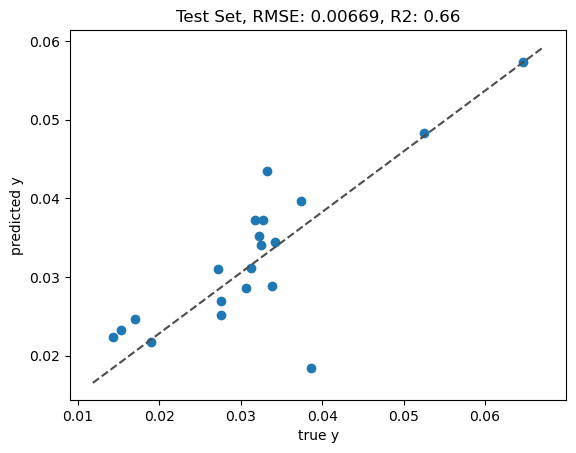

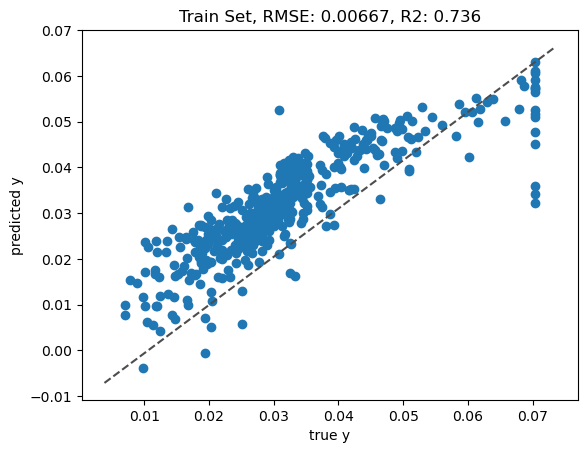

SGD loss is: 6.61156252973258e-05
(506, 13)


In [417]:
x = X

N = x.shape[0]
#x = np.column_stack([x,np.ones(N)])
y = Y

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)


SGlinReg = LinearRegressionSGD(X_train,Y_train)
SGlinReg.fitlogistic(0.001, 0.01)

evaluate = train_and_test(x,y,arr,10)
evaluate.train_and_eval(20, True)

print("SGD loss is:", SGlinReg.getMSE(X_test, Y_test))

ws = np.array(SGlinReg.w_history)
print(ws.shape)

lin = LinearRegression()
yh = model.fit(X,Y).predict(X)

# plt.plot(np.arange(len(ws)), y[:len(ws)], '.')
# for t,w in enumerate(SGlinReg.w_history):
#     plt.plot(np.arange(len(ws)), x[t,:len(ws)]*ws, 'r-', alpha=0.01*(t/len(ws)))
# plt.xlabel('x')
# plt.show()